In this notebook, we'll take Requests for a spin. Requests describes itself as an elegant and simple HTTP library, built "for human beings" (meaning that its API design is user-friendly and pleasant. See http://docs.python-requests.org/ for the full docs.

We assume you already have Requests installed. If not, run this first (the `q` flag surpresses output to keep our output clean, the `U` flag updates an existing Requests installation):

In [ ]:
!pip install -qU requests

Let's import the module first.

In [1]:
import requests

Let's now perform a basic GET request to http://www.webscrapingfordatascience.com/basichttp/ -- you can open this web page in your browser. As you can see, it doesn't look like much, but that's fine for now.

In [2]:
url = 'http://www.webscrapingfordatascience.com/basichttp/'

The easiest way to perform a GET request is:

In [3]:
r = requests.get(url)

`.get` and "GET" refer here to the fact that we send a request with a GET verb to the HTTP server. Except for the URL, we don't need to concern ourselves with headers and so on (for now).

Now let's take a look at this `r` object we have created:

In [4]:
r, str(r), repr(r), type(r)

(<Response [200]>,
 '<Response [200]>',
 '<Response [200]>',
 requests.models.Response)

As you can see, this is a `requests.models.Response` object, and it does not provide any straightforward representation. We can, however, do lots of interesting things with it using the following attributes:

In [5]:
# The HTTP reply status code and status message (reason)
print(r.status_code, r.reason)

200 OK


In [6]:
# The HTTP response headers
print(r.headers)

{'Date': 'Fri, 31 Jul 2020 09:03:11 GMT', 'Server': 'Apache/2.4.18 (Ubuntu)', 'Content-Length': '20', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html; charset=UTF-8'}


Note that these headers can be accessed as a dictionary, but they're actually a special type of dictionary:

In [7]:
type(r.headers)

requests.structures.CaseInsensitiveDict

Recall that headers in HTTP are case insensitive. Also recall that although multiple headers can share the same name, in which case Requests merges them under the same name, separated by `, `.

In [10]:
# The response body as text
print(r.text)

# The response body in raw binary form (helpful in case images or other binary content is retrieved)
print(r.content)

Hello from the web!

b'Hello from the web!\n'


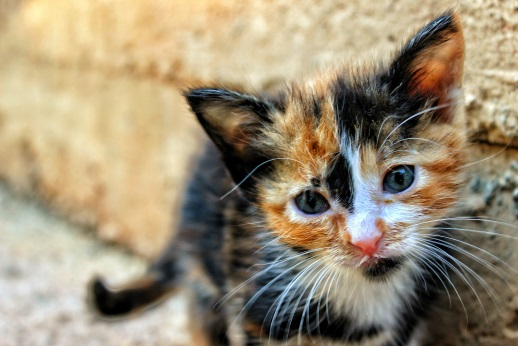

In [11]:
# E.g. for an image... (note that using .text here will lead to garbled uninterpretable output)
from IPython.display import Image
Image(
    requests.get('http://www.webscrapingfordatascience.com/files/kitten.jpg').content
)

We can also take a look at the HTTP request, which is a `requests.models.PreparedRequest` object:

In [12]:
r.request, str(r.request), repr(r.request), type(r.request)

(<PreparedRequest [GET]>,
 '<PreparedRequest [GET]>',
 '<PreparedRequest [GET]>',
 requests.models.PreparedRequest)

In [13]:
# The headers in our request (also a CaseInsensitiveDict)
print(r.request.headers)

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [14]:
# The request URL
r.request.url

'http://www.webscrapingfordatascience.com/basichttp/'

In [15]:
# The request method
r.request.method

'GET'

In [18]:
# The request body (None in this case)
r.request.body

We've only focused on the GET verb so far. Later, we will take a look at POST and other verbs. Requests also comes with a general purpose method which can be used together with any verb as follows:

In [ ]:
requests.request('GET', url)

We can also introduce URL parameters already. URL parameters are additional parameters added in an URL, following a question mark (`?`). Each parameter is separated by an ampersand `&`. Try the following URL for instance: http://www.webscrapingfordatascience.com/paramhttp/?query=BlueCourses.

This is actually pretty easy to use in Requests, as most of the time, you can just put them in the URL itself (just as shown by your browser)...

In [19]:
url = 'http://www.webscrapingfordatascience.com/paramhttp/?query=BlueCourses'
r = requests.get(url)
print(r.text)
print(r.request.url)

I don't have any information on "BlueCourses"
http://www.webscrapingfordatascience.com/paramhttp/?query=BlueCourses


The only time when this can become cumbersome is when the parameters contain special characters, i.e. characters that already have some meaning in URLs. This set of reserved characters consists of `!	*	'	(	)	;	:	@	&	=	+	$	,	/	?	#	[	]`. A slash for instance is already used to separate paths in an URL.

So what do we do in case we want to use one of those characters in a URL parameter's name or value? In some cases, the web server is able to parse our mistake correctly...

In [20]:
url = 'http://www.webscrapingfordatascience.com/paramhttp/?query=Blue/Courses'
r = requests.get(url)
print(r.text)
print(r.request.url)

I don't have any information on "Blue/Courses"
http://www.webscrapingfordatascience.com/paramhttp/?query=Blue/Courses


In [21]:
url = 'http://www.webscrapingfordatascience.com/paramhttp/?query=Blue?Courses'
r = requests.get(url)
print(r.text)
print(r.request.url)

I don't have any information on "Blue?Courses"
http://www.webscrapingfordatascience.com/paramhttp/?query=Blue?Courses


But not always...

In [22]:
url = 'http://www.webscrapingfordatascience.com/paramhttp/?query=Blue+Courses'
r = requests.get(url)
print(r.text)
print(r.request.url)

I don't have any information on "Blue Courses"
http://www.webscrapingfordatascience.com/paramhttp/?query=Blue+Courses


In [23]:
url = 'http://www.webscrapingfordatascience.com/paramhttp/?query=Blue&Courses'
r = requests.get(url)
print(r.text)
print(r.request.url)

I don't have any information on "Blue"
http://www.webscrapingfordatascience.com/paramhttp/?query=Blue&Courses


As such, the cleaner approach is to use the `params` argument instead:

In [24]:
url = 'http://www.webscrapingfordatascience.com/paramhttp/'
r = requests.get(url, params={'query': 'Blue+Courses'})
print(r.text)
print(r.request.url)

I don't have any information on "Blue+Courses"
http://www.webscrapingfordatascience.com/paramhttp/?query=Blue%2BCourses


In [27]:
url = 'http://www.webscrapingfordatascience.com/paramhttp/'
r = requests.get(url, params={'query': 'Blue&Courses'})
print(r.text)
print(r.request.url)

I don't have any information on "Blue&Courses"
http://www.webscrapingfordatascience.com/paramhttp/?query=Blue%26Courses


One thing you might be wondering about is how `params` would handle parameter ordering or duplicate parameters...

In [28]:
url = 'http://www.webscrapingfordatascience.com/paramhttp/?query=Blue&query=Courses'
r = requests.get(url)
print(r.text)
print(r.request.url)

I don't have any information on "Courses"
http://www.webscrapingfordatascience.com/paramhttp/?query=Blue&query=Courses


In [29]:
url = 'http://www.webscrapingfordatascience.com/paramhttp/'
r = requests.get(url, params={'query': 'Blue', 'query': 'Courses'})
print(r.text)
print(r.request.url)

I don't have any information on "Courses"
http://www.webscrapingfordatascience.com/paramhttp/?query=Courses


In [32]:
url = 'http://www.webscrapingfordatascience.com/paramhttp/'
r = requests.get(url, params=[('query', 'Blue'), ('query', 'Courses')])
print(r.text)
print(r.request.url)

I don't have any information on "Courses"
http://www.webscrapingfordatascience.com/paramhttp/?query=Blue&query=Courses


Let's now try taking a look at another website...

In [33]:
url = 'https://www.bluecourses.com'
r = requests.get(url)
print(r.text[:200])









<!DOCTYPE html>
<!--[if lte IE 9]><html class="ie ie9 lte9" lang="en"><![endif]-->
<!--[if !IE]><!--><html lang="en"><!--<![endif]-->
<head dir="ltr">
    <meta charset="UTF-8">
    <meta http


So here we get back a web page formatted using HTML. We'll need a way to properly parse this.